# Projétil e algoritmo de Euler

---

## 1. O Problema

Primeiramente podemos separa o problema em duas parte: do eixo $x$ e do eixo $y$. 

Temos então, em $x$:

$$ \frac{d^2x}{dt^2} = -B v_x(t) $$
$$ \frac{dx}{dt} = v_x(t) $$

e em $y$ temos:

$$ \frac{d^2y}{dt^2} = -9.8 - B v_y(t) $$
$$ \frac{dy}{dt} = v_y(t) $$

---

## 2. O Método de Euler

considerando que 

$$ \frac{d^2x}{dt^2} = \frac{dv_x}{dt} $$

e o mesmo vale para $y$, podemos aplicar o método de euler em duas partes para cada eixo:

#### Para o eixo $x$:

$$ \frac{\Delta{v_x}}{\Delta{t}} = -B v_x(t) $$

$$ v_x(t + \Delta{t}) = v_x(t) - B v_x(t) \Delta{t} $$

e

$$ \frac{\Delta{x}}{\Delta{t}} = v_x(t) $$

$$ x(t + \Delta{t}) = x(t) + v_x(t) \Delta{t} $$


#### Para o eixo $y$:

$$ \frac{\Delta{v_y}}{\Delta{t}} = -9.8 -B v_x(t) $$

$$ v_y(t + \Delta{t}) = v_y(t) - (9.8 - B v_x(t)) \Delta{t} $$

e

$$ \frac{\Delta{y}}{\Delta{t}} = v_y(t) $$

$$ y(t + \Delta{t}) = y(t) + v_y(t) \Delta{t} $$

---

#### 3. Obtendo $\tau$ e os 3 $\Delta{t}$

analiticamente, quando B = 0, temos (em $y$):

$$\frac{d^2y}{dt^2} = -9.8 $$

que podemos resolver fácilmente, obtendo:

$$ v_y(t) = v_{0_y} -9.8 y $$

e

$$ y(t) = y_0 + v_{0_y} t - 9.8  \frac{t^2}{2} $$

considerando que $v_{0_y} = v(0) \sin{\theta}$ 

para a tarefa $0$, temos que achar o momento $t$ em que oprojétil chega ao ponto $y(\tau) = 0$:

$$ 0 = 0 + 98 \sin{45^o} \tau - 9.8 \frac{\tau^2}{2} $$

obtendo que

$ \tau \cong  14.14$

temos, então os 3 $\Delta{t}$:

- $\Delta{t_1} = 1.414$
- $\Delta{t_2} = 0.1414$
- $\Delta{t_3} = 0.01414$


---

### 4. O Programa:


In [ ]:
import matplotlib.pyplot as plt
from math import *

In [ ]:
# conversão de graus para radianos
def rad(ang):
  return (ang * pi/180)
  
#o método em si
def loop_euler(x, y, v, ang, B, dt, tf):
  vy = v * sin(rad(ang))
  # print(rad(ang))
  vx = v * cos(rad(ang))
  t = 0
  
  xl, yl = [x], [y]
  while(t < tf):
    vxt = vx - B * vx * dt
    x += vx * dt
    vx = vxt
    vyt = vy - (9.8 - B * vy) * dt
    y += vy * dt
    vy = vyt

    xl.append(x)
    yl.append(y)

    t += dt
  return [xl, yl]

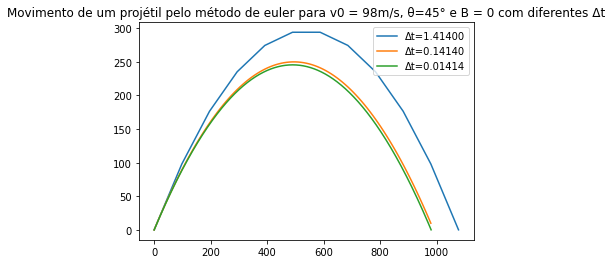

In [ ]:
tau = 14.14
dtl = [tau/10, tau/100, tau/1000]
B = 0

for dt in dtl:
  g = loop_euler(x=0, y=0, v=98, ang=45 ,B=B, dt=dt, tf=tau)

  plt.plot(g[0],g[1], label=f"Δt={format(dt, '.5f')}")

plt.legend(loc="upper right")
plt.title("Movimento de um projétil pelo método de euler para v0 = 98m/s, θ=45° e B = 0 com diferentes Δt")
plt.show()